In [1]:
pip install smt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for smt: filename=smt-1.3.0-cp37-cp37m-linux_x86_64.whl size=528042 sha256=ed21e3daa6a2cb006ff70c3b0ed579482b4db5856c849ecc68e11d76986812d2
  Stored in directory: /root/.cache/pip/wheels/e1/5b/7b/a60bcc2b0411788df670d0059b80599c9644e922dab40a6bc4
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25539 sha256=680b820a1d0562d81f3e802f38117cf98f40a64460b1f75c5a62b57f3744f42b
  Stored in directory: /root/.cache/pip/wheels/49/91/2d/d08e80806bf7756193541f6c03c0492af288fcd6158d3d0998
Successfully built smt pyDOE2


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
from smt.sampling_methods import LHS
from smt.surrogate_models import KRG
from smt.utils import compute_rms_error

In [4]:
#xlimits is define the ub and lb for Column width
xlimits = np.array([[21.00,19.00]])
sampling = LHS(xlimits=xlimits, criterion='ese', random_state=1)

ntrain = 100
xt = sampling(ntrain)

ntest = 20
xtest = sampling(ntest)

In [5]:
df=pd.DataFrame(xt)
df.to_excel('DoEofTrain.xlsx',sheet_name='xt_sheet')

df2=pd.DataFrame(xtest)
df2.to_excel('DoEofTest.xlsx',sheet_name='xtest_sheet')

In [8]:
#Read the Train and Test results.csv of Total weight
pathyt = "/content/yt.csv"
dfyt = pd.read_csv(pathyt)

pathytest = "/content/ytest.csv"
dfytest = pd.read_csv(pathytest)

In [9]:
#Read the Train and Test results.csv of Heave motion
pathyt2 = "/content/yt2.csv"
dfyt2 = pd.read_csv(pathyt2)

pathytest2 = "/content/ytest2.csv"
dfytest2 = pd.read_csv(pathytest2)

In [11]:
#Read the Train and Test results.csv of Metacentric Height
pathyt3 = "/content/yt3.csv"
dfyt3 = pd.read_csv(pathyt3)

pathytest3 = "/content/ytest3.csv"
dfytest3 = pd.read_csv(pathytest3)

In [12]:
#Read the result as array
#Output Train data (total weight)
yt = np.array(dfyt)

#Output Test data (total weight)
ytest = np.array(dfytest)

#Output Train data2 (heave motion)
yt2 = np.array(dfyt2)

#Output Test data2 (heave motion)
ytest2 = np.array(dfytest2)

#Output Train data3 (metacentric height)
yt3 = np.array(dfyt3)

#Output Test data3 (metacentric height)
ytest3 = np.array(dfytest3)

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 100
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.1795065
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 20
   
   Predicting ...
   Predicting - done. Time (sec):  0.0007048
   
   Prediction time/pt. (sec) :  0.0000352
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 20
   
   Predicting ...
   Predicting - done. Time (sec):  0.0004756
   
   Prediction time/pt. (sec) :  0.0000238
   
KRG,  err: 3.629467413213098e-09


Text(0.5, 1.0, 'Kriging model: validation of the prediction model')

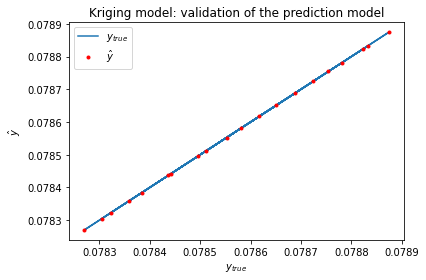

In [13]:
#Surrogate model of Total weight
sm = KRG(theta0=[0.00100241], print_prediction = True, print_problem = True, print_solver = True)
sm.set_training_values(xt, yt)
sm.train()

# Prediction of the Training points
num = 100
x = xtest
y = sm.predict_values(x)

# Prediction of the validation points
print('KRG,  err: '+str(compute_rms_error(sm,xtest,ytest)))

# the MSE # Plot prediction/true values
fig = plt.figure()
plt.plot(ytest, ytest, '-', label='$y_{true}$')
plt.plot(ytest, y, 'r.', label='$\hat{y}$')
       
plt.xlabel('$y_{true}$')
plt.ylabel('$\hat{y}$')
        
plt.legend(loc='upper left')
plt.title('Kriging model: validation of the prediction model')

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 100
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.1683433
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 20
   
   Predicting ...
   Predicting - done. Time (sec):  0.0006692
   
   Prediction time/pt. (sec) :  0.0000335
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 20
   
   Predicting ...
   Predicting - done. Time (sec):  0.0013943
   
   Prediction time/pt. (sec) :  0.0000697
   
KRG,  err: 9.616008203113042e-05


Text(0.5, 1.0, 'Kriging model: validation of the prediction model')

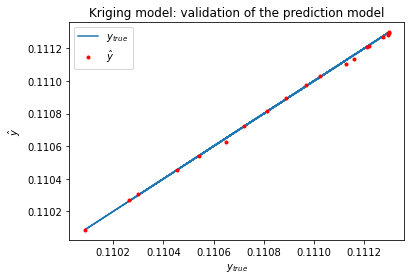

In [14]:
#Surrogate model of Heave motion
sm2 = KRG(theta0=[0.00100241], print_prediction = True, print_problem = True, print_solver = True)
sm2.set_training_values(xt, yt2)
sm2.train()

# Prediction of the Training points
num = 100
x2 = xtest
y2 = sm2.predict_values(x2)


# Prediction of the validation points
print('KRG,  err: '+str(compute_rms_error(sm2,xtest,ytest2)))

# the MSE # Plot prediction/true values
fig = plt.figure()
plt.plot(ytest2, ytest2, '-', label='$y_{true}$')
plt.plot(ytest2, y2, 'r.', label='$\hat{y}$')
       
plt.xlabel('$y_{true}$')
plt.ylabel('$\hat{y}$')
        
plt.legend(loc='upper left')
plt.title('Kriging model: validation of the prediction model')

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 100
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.1683602
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 20
   
   Predicting ...
   Predicting - done. Time (sec):  0.0007114
   
   Prediction time/pt. (sec) :  0.0000356
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 20
   
   Predicting ...
   Predicting - done. Time (sec):  0.0005467
   
   Prediction time/pt. (sec) :  0.0000273
   
KRG,  err: 1.8650577035854695e-06


Text(0.5, 1.0, 'Kriging model: validation of the prediction model')

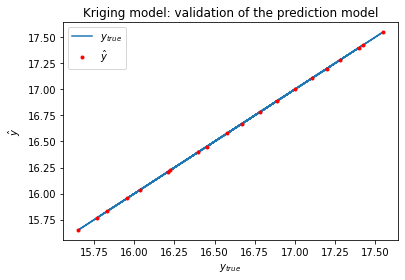

In [15]:
#Surrogate model of Metacentric height
sm3 = KRG(theta0=[0.00100241], print_prediction = True, print_problem = True, print_solver = True)
sm3.set_training_values(xt, yt3)
sm3.train()

# Prediction of the Training points
num = 100
x3 = xtest
y3 = sm3.predict_values(x2)


# Prediction of the validation points
print('KRG,  err: '+str(compute_rms_error(sm3,xtest,ytest3)))

# the MSE # Plot prediction/true values
fig = plt.figure()
plt.plot(ytest3, ytest3, '-', label='$y_{true}$')
plt.plot(ytest3, y3, 'r.', label='$\hat{y}$')
       
plt.xlabel('$y_{true}$')
plt.ylabel('$\hat{y}$')
        
plt.legend(loc='upper left')
plt.title('Kriging model: validation of the prediction model')

In [16]:
#Data of initial structure's Total weight and Heave motion
#Initial
totalweight = 0.078566065
heavemotion = 0.110997229814529
gm = 16.6220512390136

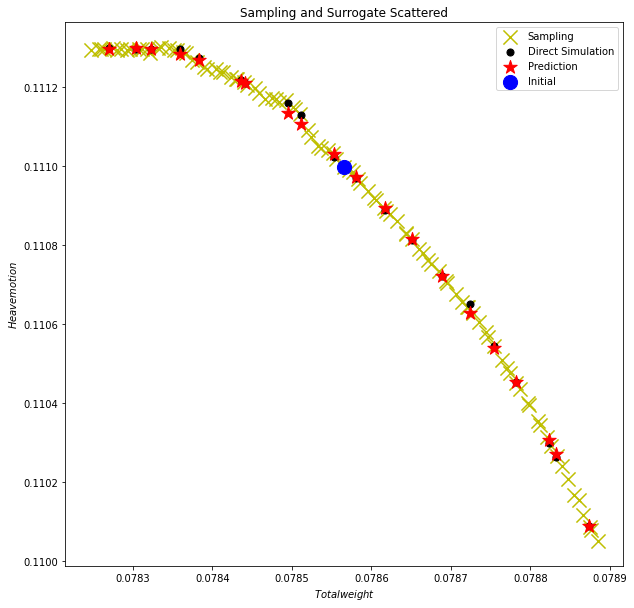

In [17]:
#To visualize the sampling and surrogate relations
fig = plt.figure(figsize=(10, 10))
plt.scatter(yt,yt2,marker = 'x',c='y',s=200,label='Sampling')
plt.scatter(ytest,ytest2,marker = '.',c='k', s=200, label='Direct Simulation')
plt.scatter(y,y2,marker = '*',c='r',s=200,label='Prediction')
plt.scatter(totalweight,heavemotion,marker = 'o',c='b',s=200,label='Initial')
plt.title('Sampling and Surrogate Scattered')
plt.xlabel('$Total weight$')
plt.ylabel('$Heave motion$')
plt.legend()
plt.show()

# RBF

In [18]:
from smt.surrogate_models import RBF

___________________________________________________________________________
   
                                    RBF
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 100
   
___________________________________________________________________________
   
 Training
   
   Training ...
      Initializing linear solver ...
         Performing LU fact. (100 x 100 mtx) ...
         Performing LU fact. (100 x 100 mtx) - done. Time (sec):  0.0018880
      Initializing linear solver - done. Time (sec):  0.0020013
      Solving linear system (col. 0) ...
         Back solving (100 x 100 mtx) ...
         Back solving (100 x 100 mtx) - done. Time (sec):  0.0002031
      Solving linear system (col. 0) - done. Time (sec):  0.0002937
   Training - done. Time (sec):  0.0070360
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 20
   
   Predicting .

Text(0.5, 1.0, 'RBF model: validation of the prediction model')

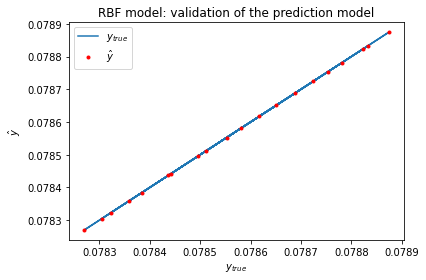

In [19]:
#RBF
#Surrogate model of Total weight
sm12 = RBF(d0=2)
sm12.set_training_values(xt, yt)
sm12.train()

# Prediction of the Training points
num = 100
x12 = xtest
y12 = sm12.predict_values(x12)

# Prediction of the validation points
print('RBF,  err: '+str(compute_rms_error(sm12,xtest,ytest)))

# the MSE # Plot prediction/true values
fig = plt.figure()
plt.plot(ytest, ytest, '-', label='$y_{true}$')
plt.plot(ytest, y12, 'r.', label='$\hat{y}$')
       
plt.xlabel('$y_{true}$')
plt.ylabel('$\hat{y}$')
        
plt.legend(loc='upper left')
plt.title('RBF model: validation of the prediction model')

___________________________________________________________________________
   
                                    RBF
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 100
   
___________________________________________________________________________
   
 Training
   
   Training ...
      Initializing linear solver ...
         Performing LU fact. (100 x 100 mtx) ...
         Performing LU fact. (100 x 100 mtx) - done. Time (sec):  0.0276108
      Initializing linear solver - done. Time (sec):  0.0278087
      Solving linear system (col. 0) ...
         Back solving (100 x 100 mtx) ...
         Back solving (100 x 100 mtx) - done. Time (sec):  0.0014927
      Solving linear system (col. 0) - done. Time (sec):  0.0016487
   Training - done. Time (sec):  0.0307515
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 20
   
   Predicting .

Text(0.5, 1.0, 'RBF model: validation of the prediction model')

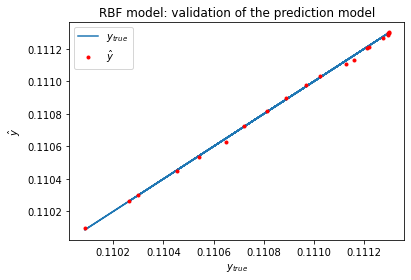

In [20]:
#Surrogate model of Heave motion
sm22 = RBF(d0=15)
sm22.set_training_values(xt, yt2)
sm22.train()

# Prediction of the Training points
num = 100
x22 = xtest
y22 = sm22.predict_values(x22)

# Prediction of the validation points
print('RBF,  err: '+str(compute_rms_error(sm22,xtest,ytest2)))

# the MSE # Plot prediction/true values
fig = plt.figure()
plt.plot(ytest2, ytest2, '-', label='$y_{true}$')
plt.plot(ytest2, y22, 'r.', label='$\hat{y}$')
       
plt.xlabel('$y_{true}$')
plt.ylabel('$\hat{y}$')
        
plt.legend(loc='upper left')
plt.title('RBF model: validation of the prediction model')

___________________________________________________________________________
   
                                    RBF
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 100
   
___________________________________________________________________________
   
 Training
   
   Training ...
      Initializing linear solver ...
         Performing LU fact. (100 x 100 mtx) ...
         Performing LU fact. (100 x 100 mtx) - done. Time (sec):  0.0022790
      Initializing linear solver - done. Time (sec):  0.0073404
      Solving linear system (col. 0) ...
         Back solving (100 x 100 mtx) ...
         Back solving (100 x 100 mtx) - done. Time (sec):  0.0001140
      Solving linear system (col. 0) - done. Time (sec):  0.0002015
   Training - done. Time (sec):  0.0086062
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 20
   
   Predicting .

Text(0.5, 1.0, 'RBF model: validation of the prediction model')

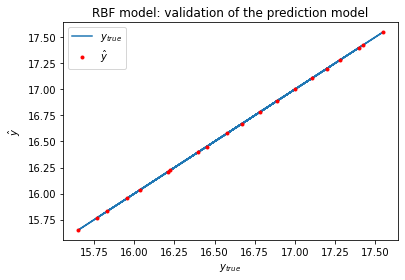

In [21]:
#Surrogate model of Heave motion
sm32 = RBF(d0=85)
sm32.set_training_values(xt, yt3)
sm32.train()

# Prediction of the Training points
num = 100
x32 = xtest
y32 = sm32.predict_values(x32)

# Prediction of the validation points
print('RBF,  err: '+str(compute_rms_error(sm32,xtest,ytest3)))

# the MSE # Plot prediction/true values
fig = plt.figure()
plt.plot(ytest3, ytest3, '-', label='$y_{true}$')
plt.plot(ytest3, y32, 'r.', label='$\hat{y}$')
       
plt.xlabel('$y_{true}$')
plt.ylabel('$\hat{y}$')
        
plt.legend(loc='upper left')
plt.title('RBF model: validation of the prediction model')

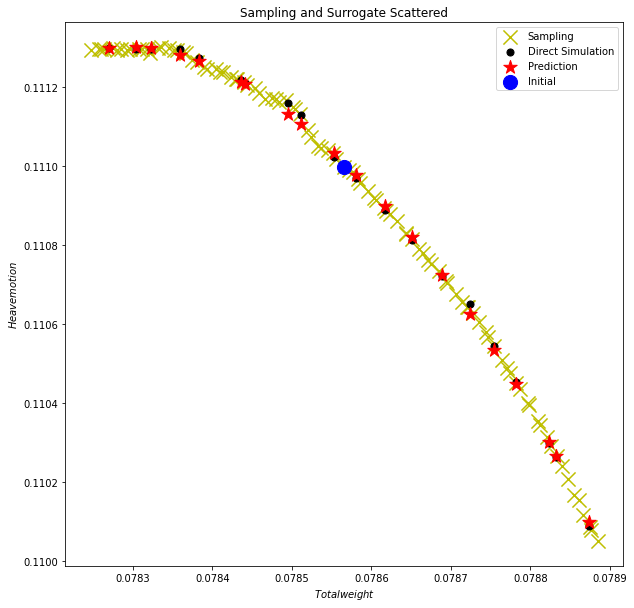

In [22]:
#To visualize the sampling and surrogate relations
fig = plt.figure(figsize=(10, 10))
plt.scatter(yt,yt2,marker = 'x',c='y',s=200,label='Sampling')
plt.scatter(ytest,ytest2,marker = '.',c='k', s=200, label='Direct Simulation')
plt.scatter(y12,y22,marker = '*',c='r',s=200,label='Prediction')
plt.scatter(totalweight,heavemotion,marker = 'o',c='b',s=200,label='Initial')
plt.title('Sampling and Surrogate Scattered')
plt.xlabel('$Total weight$')
plt.ylabel('$Heave motion$')
plt.legend()
plt.show()